In [1]:
!which python

/home/alex/anaconda2/envs/py36/bin/python


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# 0. Read Data

In [3]:
def clean_line(line):
    output_dict = dict()
    split_line = line.replace('\n','').split(' ')
    output_dict['date'] = split_line[0]
    output_dict['size'] = ' '.join(split_line[1:3])
    output_dict['n_applicants'] = split_line[3]
    output_dict['n_chances'] = split_line[4]
    output_dict['winning_chances'] = split_line[5]
    return output_dict

In [4]:
data = []
with open('raw_data.txt') as f:
    for line in f:
        data.append(clean_line(line))


In [5]:
df = pd.DataFrame(data)
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
for col in ['n_applicants', 'n_chances', 'winning_chances']:
    df[col] = df[col].apply(lambda x: int(x) if x != 'None' else 0)


In [6]:
df.to_csv('clean_data.csv')

In [7]:
df = df.loc[df['size'] == 'Standard Size']

# 1. Total Applicants

In [8]:
plotly.offline.init_notebook_mode(connected=True)

NameError: name 'plotly' is not defined

In [9]:
!which python

/home/alex/anaconda2/envs/py36/bin/python


In [238]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [93]:
trace = go.Scatter(
    x = df['date'],
    y = df['n_applicants']
)
data = [trace]

plotly.offline.iplot(data, filename='basic-line')

# 2. Odds Over Time

In [15]:
df['odds'] = 1 / df['n_chances']

In [153]:
trace = go.Scatter(
    x = df['date'],
    y = df['odds']
)
data = [trace]

plotly.offline.iplot(data, filename='basic-line')

# 3. Odds by Day Of Week

In [245]:
df['day_of_week'] = df['date'].apply(lambda x: x.weekday())
df['week_of_year'] = df['date'].apply(lambda x: int(x.strftime('%U')))
df['month'] = df['date'].apply(lambda x: x.month)

In [246]:
df.head()

,date,n_applicants,n_chances,size,winning_chances,odds,day_of_week,week of year,week_of_year,month
0,2017-01-01,14,61,Standard Size,5,0.016393,6,1,1,1
1,2017-01-02,15,55,Standard Size,5,0.018182,0,1,1,1
2,2017-01-03,11,38,Standard Size,2,0.026316,1,1,1,1
3,2017-01-04,11,34,Standard Size,3,0.029412,2,1,1,1
4,2017-01-05,7,23,Standard Size,1,0.043478,3,1,1,1


In [156]:
df_grouped = df.groupby('day_of_week')['odds'].agg([np.mean, np.std]).reset_index()

In [217]:
dow_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [157]:
df_grouped['day_of_week_text'] = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [158]:
trace = go.Bar(
            x=df_grouped['day_of_week_text'],
            y=df_grouped['mean'],
    )
data = [trace]

plotly.offline.iplot(data, filename='basic-line')

In [215]:
trace = go.Box(
    y=df['n_chances'],
    x=df['day_of_week']
    )
data = [trace]

plotly.offline.iplot(data, filename='basic-line')

In [258]:
fig['layout']

Layout({
    'barmode': 'overlay',
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'title': {'text': 'Distplot with Normal Distribution'},
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.0, 1], 'position': 0.0}
})

In [257]:
go.Layout(
                            title='sample title',
                            xaxis={'title':'x1'},
                            yaxis={'title':'x2'},
                            height=350
                        )

Layout({
    'height': 350,
    'title': {'text': 'sample title'},
    'xaxis': {'title': {'text': 'x1'}},
    'yaxis': {'title': {'text': 'x2'}}
})

In [256]:
dow_data = []
for i in range(7):
    df_sub = df.loc[(df['day_of_week'] == i) & (df['month'] == 3)]
    dow_data.append(df_sub['n_chances'].values)
fig = ff.create_distplot(dow_data, dow_names, curve_type='normal', show_hist=False, show_rug=False)
fig['layout'].update(title='Distplot with Normal Distribution')
plotly.offline.iplot(fig, filename='Distplot with Normal Curve')

In [239]:
df.columns

Index(['date', 'n_applicants', 'n_chances', 'size', 'winning_chances', 'odds',
       'day_of_week', 'week of year', 'week_of_year'],
      dtype='object')

In [243]:
dow_data = []
for i in range(7):
    df_sub = df.loc[df['day_of_week'] == i]
    dow_data.append(df_sub['odds'].values)
fig = ff.create_distplot(dow_data, dow_names, curve_type='normal',bin_size=.001)
fig['layout'].update(title='Distplot with Normal Distribution')
plotly.offline.iplot(fig, filename='Distplot with Normal Curve')

In [235]:
print([np.mean(data) for data in dow_data])
print([np.std(data) for data in dow_data])

[402.86624203821657, 410.8837209302326, 396.00564971751413, 359.8011363636364, 312.66272189349115, 288.6909090909091, 308.17721518987344]
[352.52678618092233, 378.54791158174265, 355.8316668163805, 307.5311517828568, 257.1392661959862, 231.62963169895107, 259.36149736669756]


In [254]:
fig = ff.create_distplot(dow_data, dow_names, curve_type='normal',bin_size=100, show_hist=False)
fig['layout'].update(title='Distplot with Normal Distribution')
plotly.offline.iplot(fig, filename='Distplot with Normal Curve')

# 4. Odds by Week of Year

In [159]:
df_grouped = df.groupby('week_of_year')['odds'].agg([np.mean, np.std]).reset_index()

In [160]:
trace = go.Scatter(
            x=df_grouped['week_of_year'],
            y=df_grouped['mean'],
    )
data = [trace]

plotly.offline.iplot(data, filename='basic-line')

# 5. Forecast

In [12]:
from fbprophet import Prophet

In [169]:
ts_df = df[['date', 'n_chances']]
ts_df.columns = ['ds', 'y']

In [170]:
m = Prophet()
m.fit(ts_df)
future = m.make_future_dataframe(periods=365)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [192]:
forecast = m.predict(future)

In [194]:
for column in ['yhat', 'yhat_upper', 'yhat_lower']:
    forecast[column] = forecast[column].apply(lambda x: 0 if x < 0 else x)

In [195]:
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

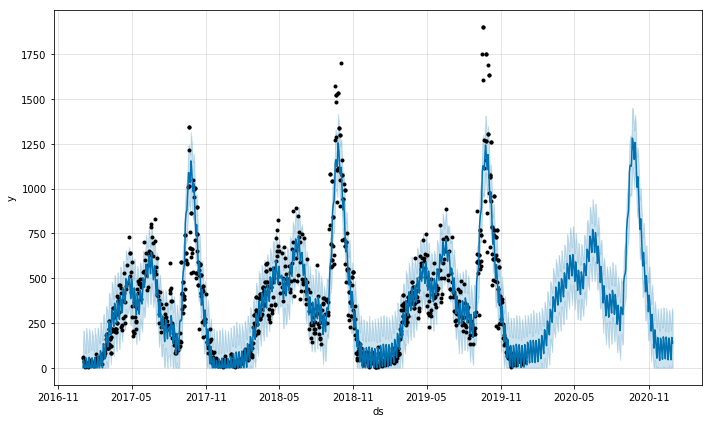

In [196]:
fig1 = m.plot(forecast)


In [197]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,308.216782,0.000000,130.172134,308.216782,308.216782,-341.746913,-341.746913,-341.746913,-17.037257,-17.037257,-17.037257,-324.709656,-324.709656,-324.709656,0.0,0.0,0.0,0.000000
1,2017-01-02,308.131490,0.000000,208.337354,308.131490,308.131490,-264.422877,-264.422877,-264.422877,58.446744,58.446744,58.446744,-322.869621,-322.869621,-322.869621,0.0,0.0,0.0,43.708613
2,2017-01-03,308.046198,0.000000,198.046971,308.046198,308.046198,-274.663756,-274.663756,-274.663756,46.326295,46.326295,46.326295,-320.990051,-320.990051,-320.990051,0.0,0.0,0.0,33.382442
3,2017-01-04,307.960905,0.000000,165.673995,307.960905,307.960905,-294.406527,-294.406527,-294.406527,24.706005,24.706005,24.706005,-319.112532,-319.112532,-319.112532,0.0,0.0,0.0,13.554378
4,2017-01-05,307.875613,0.000000,142.313602,307.875613,307.875613,-325.536287,-325.536287,-325.536287,-8.258723,-8.258723,-8.258723,-317.277564,-317.277564,-317.277564,0.0,0.0,0.0,0.000000
5,2017-01-06,307.790321,0.000000,98.554968,307.790321,307.790321,-355.276441,-355.276441,-355.276441,-39.753154,-39.753154,-39.753154,-315.523287,-315.523287,-315.523287,0.0,0.0,0.0,0.000000
6,2017-01-07,307.705029,0.000000,80.872510,307.705029,307.705029,-378.314213,-378.314213,-378.314213,-64.429910,-64.429910,-64.429910,-313.884303,-313.884303,-313.884303,0.0,0.0,0.0,0.000000
7,2017-01-08,307.619737,0.000000,142.365057,307.619737,307.619737,-329.427911,-329.427911,-329.427911,-17.037257,-17.037257,-17.037257,-312.390654,-312.390654,-312.390654,0.0,0.0,0.0,0.000000
8,2017-01-09,307.534445,0.000000,221.686762,307.534445,307.534445,-252.620215,-252.620215,-252.620215,58.446744,58.446744,58.446744,-311.066959,-311.066959,-311.066959,0.0,0.0,0.0,54.914230
9,2017-01-10,307.449153,0.000000,197.619091,307.449153,307.449153,-263.605455,-263.605455,-263.605455,46.326295,46.326295,46.326295,-309.931750,-309.931750,-309.931750,0.0,0.0,0.0,43.843698


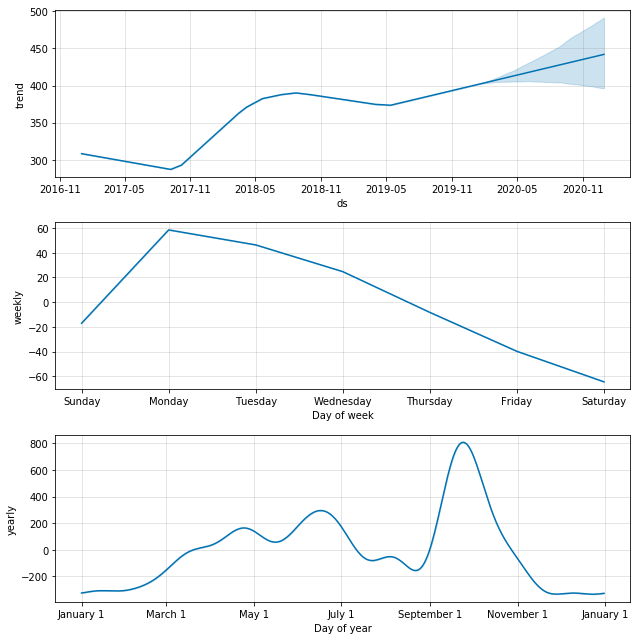

In [198]:
fig2 = m.plot_components(forecast)

# 6. Projections with Uncertainty

In [199]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [213]:
lower_bound = go.Scatter(
    name = 'Lower Bound',
    x = forecast['ds'],
    y = forecast['yhat_lower'],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines'
)

upper_bound = go.Scatter(
    name = 'Upper Bound',
    x = forecast['ds'],
    y = forecast['yhat_upper'],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
)

yhat = go.Scatter(
    name = 'Predicted Value',
    x = forecast['ds'],
    y = forecast['yhat'],    
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
)

actual = go.Scatter(
    name = 'Actual Value',
    x = df['date'],
    y = df['n_chances'],    
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
)

data = [lower_bound, upper_bound, yhat]

layout = go.Layout(
    yaxis=dict(title='Number of Chances'),
    title='Grand Canyon Number of Chances',
    showlegend = False)
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='basic-line')

# 7. Seasonality

In [16]:
def create_forecast(df, col_name):
    ts_df = df[['date', col_name]]
    ts_df.columns = ['ds', 'y']
    m = Prophet()
    m.fit(ts_df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    for column in ['yhat', 'yhat_upper', 'yhat_lower']:
        forecast[column] = forecast[column].apply(lambda x: 0 if x < 0 else x)
    forecast['metric'] = col_name
    
    forecast = forecast.merge(ts_df, on='ds', how='left')
    forecast = forecast.rename(index=str, columns={"ds": "date"})
    
    return forecast

In [17]:
metric_lst = ['n_applicants', 'n_chances', 'odds']
combined = pd.concat([create_forecast(df, col) for col in metric_lst])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [279]:
combined.head()

,date,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,metric,y
0,2017-01-01,308.216782,0.0,122.316265,308.216782,308.216782,-341.746913,-341.746913,-341.746913,-17.037257,...,-17.037257,-324.709656,-324.709656,-324.709656,0.0,0.0,0.0,0.000000,n_applicants,61.0
1,2017-01-02,308.131490,0.0,212.294930,308.131490,308.131490,-264.422877,-264.422877,-264.422877,58.446744,...,58.446744,-322.869621,-322.869621,-322.869621,0.0,0.0,0.0,43.708613,n_applicants,55.0
2,2017-01-03,308.046198,0.0,187.816928,308.046198,308.046198,-274.663756,-274.663756,-274.663756,46.326295,...,46.326295,-320.990051,-320.990051,-320.990051,0.0,0.0,0.0,33.382442,n_applicants,38.0
3,2017-01-04,307.960905,0.0,165.475651,307.960905,307.960905,-294.406527,-294.406527,-294.406527,24.706005,...,24.706005,-319.112532,-319.112532,-319.112532,0.0,0.0,0.0,13.554378,n_applicants,34.0
4,2017-01-05,307.875613,0.0,135.940770,307.875613,307.875613,-325.536287,-325.536287,-325.536287,-8.258723,...,-8.258723,-317.277564,-317.277564,-317.277564,0.0,0.0,0.0,0.000000,n_applicants,23.0


In [18]:
combined.to_csv('forecast.csv')

In [289]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,308.216782,0.0,130.172134,308.216782,308.216782,-341.746913,-341.746913,-341.746913,-17.037257,-17.037257,-17.037257,-324.709656,-324.709656,-324.709656,0.0,0.0,0.0,0.000000
1,2017-01-02,308.131490,0.0,208.337354,308.131490,308.131490,-264.422877,-264.422877,-264.422877,58.446744,58.446744,58.446744,-322.869621,-322.869621,-322.869621,0.0,0.0,0.0,43.708613
2,2017-01-03,308.046198,0.0,198.046971,308.046198,308.046198,-274.663756,-274.663756,-274.663756,46.326295,46.326295,46.326295,-320.990051,-320.990051,-320.990051,0.0,0.0,0.0,33.382442
3,2017-01-04,307.960905,0.0,165.673995,307.960905,307.960905,-294.406527,-294.406527,-294.406527,24.706005,24.706005,24.706005,-319.112532,-319.112532,-319.112532,0.0,0.0,0.0,13.554378
4,2017-01-05,307.875613,0.0,142.313602,307.875613,307.875613,-325.536287,-325.536287,-325.536287,-8.258723,-8.258723,-8.258723,-317.277564,-317.277564,-317.277564,0.0,0.0,0.0,0.000000


# 8. Extract Forecast Chart

In [290]:
def create_trend_chart(forecast, metric_name):
    lower_bound = go.Scatter(
        name = 'Lower Bound',
        x = forecast['ds'],
        y = forecast[metric_name + '_lower'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines'
    )

    upper_bound = go.Scatter(
        name = 'Upper Bound',
        x = forecast['ds'],
        y = forecast[metric_name + '_upper'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty'
    )

    metric = go.Scatter(
        name = 'Predicted Value',
        x = forecast['ds'],
        y = forecast[metric_name],    
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty'
    )
    data = [lower_bound, upper_bound, metric]

    layout = go.Layout(
        yaxis=dict(title=metric_name),
        title='sample title',
        showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    return fig


In [296]:
set(forecast['weekly'].apply(lambda x: round(x,4)))

{-64.4299, -39.7532, -17.0373, -8.2587, 24.706, 46.3263, 58.4467}

In [293]:
pd.unique(forecast['weekly']).shape

(1369,)

In [ ]:
combined = forecast.loc

In [291]:
fig = create_trend_chart(forecast, 'trend')
plotly.offline.iplot(fig, filename='basic-line')

In [282]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1534,2020-12-26,441.587859,0.000000,209.587935,396.566107,490.407336,-397.222403,-397.222403,-397.222403,-64.429910,-64.429910,-64.429910,-332.792493,-332.792493,-332.792493,0.0,0.0,0.0,44.365457
1535,2020-12-27,441.702874,0.000000,262.060936,396.514484,490.749415,-348.992387,-348.992387,-348.992387,-17.037257,-17.037257,-17.037257,-331.955130,-331.955130,-331.955130,0.0,0.0,0.0,92.710487
1536,2020-12-28,441.817889,10.097530,332.262115,396.561622,491.091494,-272.433610,-272.433610,-272.433610,58.446744,58.446744,58.446744,-330.880354,-330.880354,-330.880354,0.0,0.0,0.0,169.384279
1537,2020-12-29,441.932904,0.256407,327.310981,396.518192,491.433573,-283.262482,-283.262482,-283.262482,46.326295,46.326295,46.326295,-329.588777,-329.588777,-329.588777,0.0,0.0,0.0,158.670422
1538,2020-12-30,442.047918,0.000000,308.968199,396.465006,491.769664,-303.401441,-303.401441,-303.401441,24.706005,24.706005,24.706005,-328.107446,-328.107446,-328.107446,0.0,0.0,0.0,138.646477


In [297]:
tmp = combined.loc[combined['metric'] == 'n_chances']

In [298]:
tmp.head()

,date,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,metric,y
0,2017-01-01,308.216782,0.0,122.588089,308.216782,308.216782,-341.746913,-341.746913,-341.746913,-17.037257,...,-17.037257,-324.709656,-324.709656,-324.709656,0.0,0.0,0.0,0.000000,n_chances,61.0
1,2017-01-02,308.131490,0.0,203.150291,308.131490,308.131490,-264.422877,-264.422877,-264.422877,58.446744,...,58.446744,-322.869621,-322.869621,-322.869621,0.0,0.0,0.0,43.708613,n_chances,55.0
2,2017-01-03,308.046198,0.0,182.217484,308.046198,308.046198,-274.663756,-274.663756,-274.663756,46.326295,...,46.326295,-320.990051,-320.990051,-320.990051,0.0,0.0,0.0,33.382442,n_chances,38.0
3,2017-01-04,307.960905,0.0,174.416617,307.960905,307.960905,-294.406527,-294.406527,-294.406527,24.706005,...,24.706005,-319.112532,-319.112532,-319.112532,0.0,0.0,0.0,13.554378,n_chances,34.0
4,2017-01-05,307.875613,0.0,131.972703,307.875613,307.875613,-325.536287,-325.536287,-325.536287,-8.258723,...,-8.258723,-317.277564,-317.277564,-317.277564,0.0,0.0,0.0,0.000000,n_chances,23.0


In [ ]:
lower_bound = go.Scatter(
    name = 'Lower Bound',
    x = forecast['ds'],
    y = forecast['yhat_lower'],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines'
)

upper_bound = go.Scatter(
    name = 'Upper Bound',
    x = forecast['ds'],
    y = forecast['yhat_upper'],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
)

yhat = go.Scatter(
    name = 'Predicted Value',
    x = forecast['ds'],
    y = forecast['yhat'],    
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
)
